# Time Series with Pandas

## Datime Object in NumPy

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
y = 2020
m = 1
d = 2
h = 13
mm = 30
s = 15

In [3]:
date = datetime(y, m, d)

In [4]:
date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
date2 = datetime(y, m, d, h, mm, s)

In [6]:
type(date2)

datetime.datetime

In [7]:
np.array('2020-03-15 2020-03-16 2020-03-17'.split())

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [8]:
np.array('2020-03-15 2020-03-16 2020-03-17'.split(), dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [9]:
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

## Datetime Object in Pandas

In [10]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.to_datetime(['1/2/2018', '1/3/2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [12]:
pd.to_datetime(['2/1/2018', '3/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime(['2/1/2018', '3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [14]:
rng = np.random.default_rng(42)

In [15]:
data = rng.standard_normal((3, 2))
cols = list('AB')
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-01-01,0.304717,-1.039984
2020-01-02,0.750451,0.940565
2020-01-03,-1.951035,-1.302180


In [16]:
print(df)

                   A         B
2020-01-01  0.304717 -1.039984
2020-01-02  0.750451  0.940565
2020-01-03 -1.951035 -1.302180


In [17]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [18]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [19]:
df.index.argmin()

0

## Time Resampling

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# import matplotlib.dates as mdates

In [21]:
file = '/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/starbucks.csv'

In [22]:
# Instantiate the dataframe with a named index
df = pd.read_csv(file, index_col='Date', parse_dates=True)
# If we do not pass the parse_dates parameter, use the following.
# df.index = pd.to_datetime(df.index)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1006.0,5.407013e+01,4.849600e+00,3.697480e+01,5.217007e+01,5.463160e+01,5.660348e+01,6.835300e+01
Volume,1006.0,9.617402e+06,4.986199e+06,2.215418e+06,6.828217e+06,8.338076e+06,1.091071e+07,6.209107e+07


In [24]:
def describe2(df):
    df_res = df.describe()
    df_res.loc['range'] = df_res.loc['max'] - df_res.loc['min']
    return df_res

In [25]:
describe2(df).T

,count,mean,std,min,25%,50%,75%,max,range
Close,1006.0,5.407013e+01,4.849600e+00,3.697480e+01,5.217007e+01,5.463160e+01,5.660348e+01,6.835300e+01,3.137820e+01
Volume,1006.0,9.617402e+06,4.986199e+06,2.215418e+06,6.828217e+06,8.338076e+06,1.091071e+07,6.209107e+07,5.987565e+07


In [26]:
# Note that it isn't a datetime index atm
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [27]:
# daily -> yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [28]:
def first_day(entry):
    # Is there an entry?
    if len(entry):
        # Return first entry
        return entry[0]

In [29]:
# daily -> yearly
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [30]:
df['Close'].resample('A').mean()

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

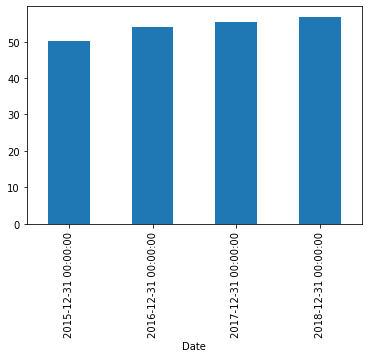

In [31]:
df['Close'].resample('A').mean().plot.bar()

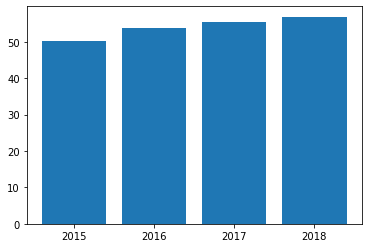

In [32]:
idx = df.resample(rule='A').mean().index.year
y = df['Close'].resample('A').mean().values

ax = plt.bar(idx, y, tick_label=idx)

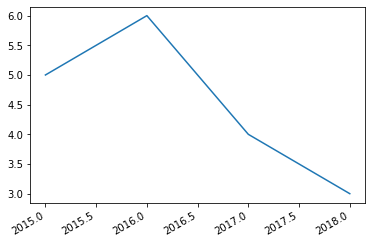

In [33]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myDates = [datetime(2012, 1, i + 3) for i in range(10)]
myValues = [5, 6, 4, 3]
fig, ax = plt.subplots()
idx3 = [1, 2, 3, 4]

ax.plot(idx, myValues)

# plt.locator_params(axis='x', nbins=4)

# myFmt = DateFormatter("%d-%m-%Y")
# ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()

## Time Shifting

In [34]:
df.head(2)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796


In [35]:
df.tail(2)

,Close,Volume
Date,,
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [36]:
# Empty data point in the first row and lose last data point
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [37]:
# Shift data point to end of the month
df.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


## Rolling and Expanding

In [38]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

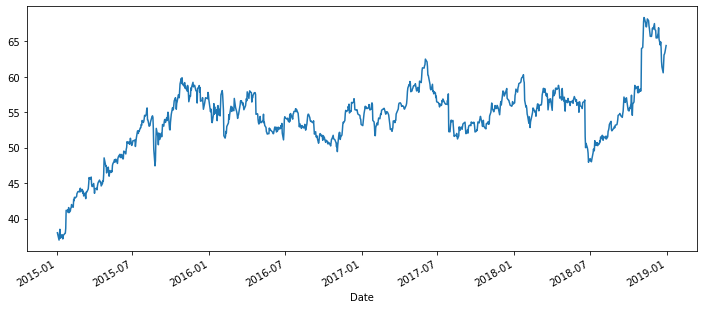

In [39]:
df.Close.plot(figsize=(12, 5))

In [40]:
df.Close.rolling(window=30).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2018-12-24    65.963703
2018-12-26    65.791913
2018-12-27    65.647000
2018-12-28    65.525000
2018-12-31    65.437000
Name: Close, Length: 1006, dtype: float64

<AxesSubplot:xlabel='Date'>

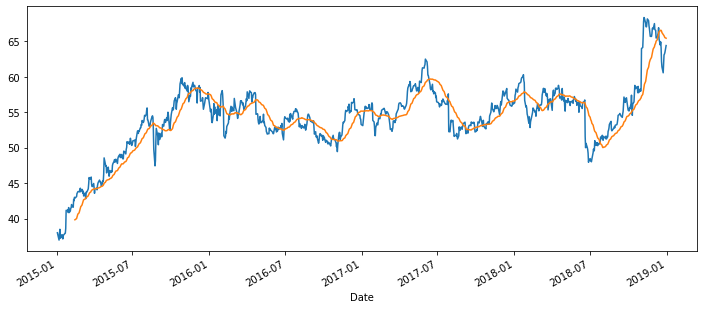

In [41]:
df.Close.plot(figsize=(12, 5))
df.Close.rolling(window=30).mean().plot()

In [42]:
df['MA(30)'] = df.Close.rolling(window=30).mean()

In [43]:
df.iloc[29:34:]

,Close,Volume,MA(30)
Date,,,
2015-02-13,42.8942,6109522,39.835057
2015-02-17,43.1050,6386900,40.005020
2015-02-18,43.5593,6541986,40.214393
2015-02-19,43.6390,6109176,40.436533
2015-02-20,43.7982,6462662,40.633647


<AxesSubplot:xlabel='Date'>

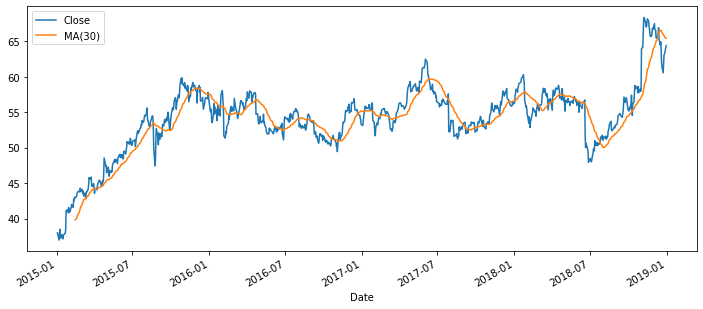

In [44]:
df['Close MA(30)'.split()].plot(figsize=(12, 5))

In [45]:
df.Close.expanding().mean().head()

Date
2015-01-02    38.006100
2015-01-05    37.642100
2015-01-06    37.419667
2015-01-07    37.535950
2015-01-08    37.727980
Name: Close, dtype: float64

## Visualizing Time Series Data

In [46]:
df = pd.read_csv(file, index_col='Date', parse_dates=True)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1006.0,5.407013e+01,4.849600e+00,3.697480e+01,5.217007e+01,5.463160e+01,5.660348e+01,6.835300e+01
Volume,1006.0,9.617402e+06,4.986199e+06,2.215418e+06,6.828217e+06,8.338076e+06,1.091071e+07,6.209107e+07


<AxesSubplot:xlabel='Date'>

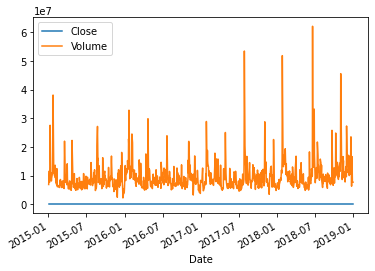

In [48]:
# Columns have wildly different scales -> Plot the curves sepparetely
df.plot()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Close Price')]

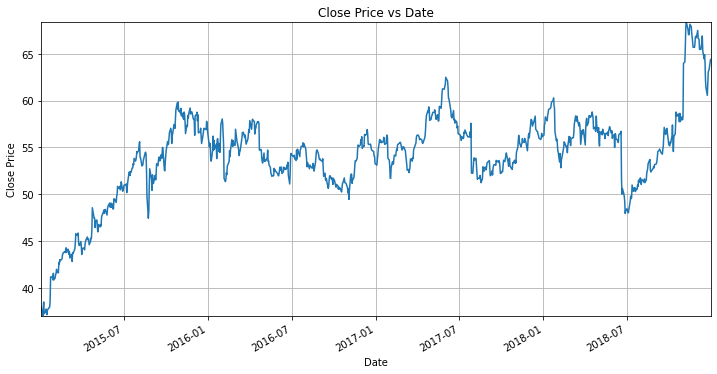

In [49]:
# Creaate plot and set title
ax = df.Close.plot(figsize=(12, 6), title='Close Price vs Date', grid=True)
# Scale the graph
ax.autoscale(axis='both', tight=True)
# Set labels
ax.set(xlabel='Date', ylabel='Close Price')

Text(0.5, 1.0, 'Another Title')

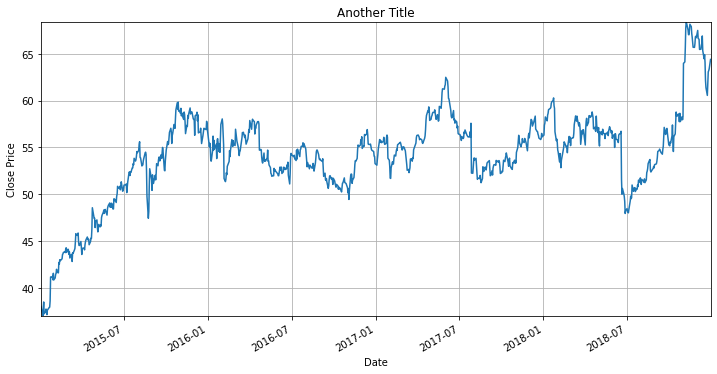

In [61]:
# Creaate plot and set title
ax = df.Close.plot(figsize=(12, 6), grid=True)
# Scale the graph
ax.autoscale(axis='both', tight=True)
# Set labels
ax.set(xlabel='Date', ylabel='Close Price')
plt.title('Another Title')

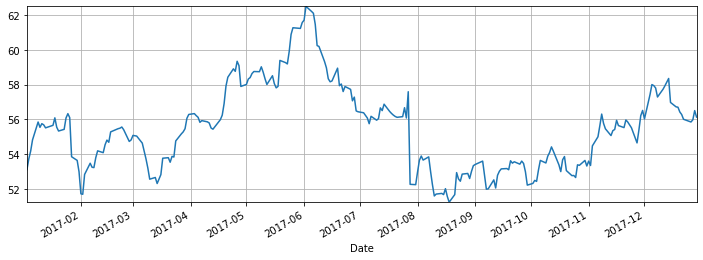

In [50]:
ax = df.Close['2017-01-01':'2018-01-01'].plot(figsize=(12, 4), grid=True)
ax.autoscale(axis='both', tight=True)

<AxesSubplot:xlabel='Date'>

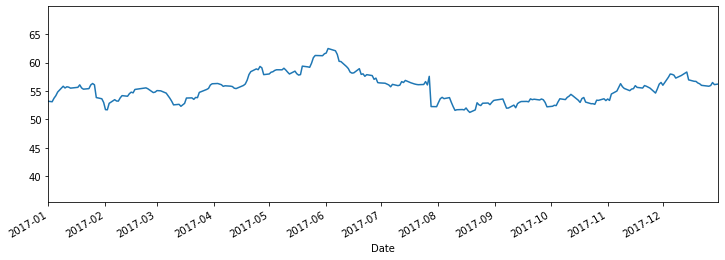

In [51]:
df.Close.plot(figsize=(12, 4), xlim=['2017-01-01', '2017-12-31'])

In [52]:
file = '/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/starbucks.csv'

In [53]:
# import numpy as np
# import pandas as pd
# from datetime import datetime

# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter
from matplotlib import dates

In [54]:
df = pd.read_csv(file, index_col='Date', parse_dates=True)

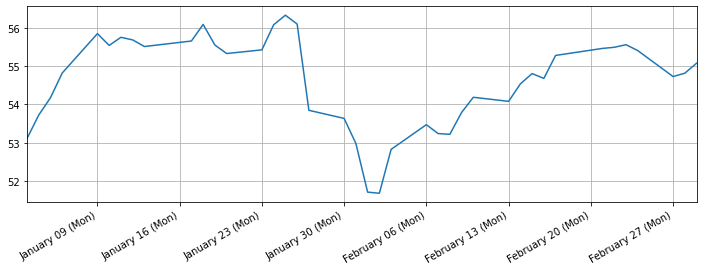

In [55]:
# Create subplot
ax = df.Close.loc['2017-01-01':'2017-03-01'].plot(figsize=(12, 4), grid=True)
# Scale subplot
ax.autoscale(axis='x',tight=True)

# Remove x-label
ax.set(xlabel='')

# Set location of tick labels
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
# Set format of tick labels
ax.xaxis.set_major_formatter(dates.DateFormatter('%B %d (%a)'))

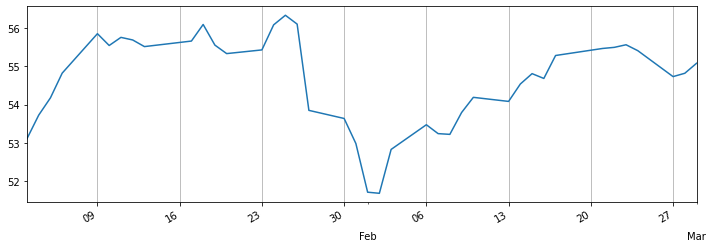

In [56]:
# Create subplot
ax = df.Close.loc['2017-01-01':'2017-03-01'].plot(figsize=(12, 4))
# Scale subplot
ax.autoscale(axis='x',tight=True)

# Remove x-label
ax.set(xlabel='')

# Set location of tick labels
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
# Set format of tick labels
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

# Set location of minor tick labels
ax.xaxis.set_minor_locator(dates.MonthLocator())
# Set format of minor tick labels
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'));

# Show grid
ax.xaxis.grid(True)

In [57]:
df.index[0:5].strftime('%A')

Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

In [58]:
def dow(date):
    return date.strftime('%A')

In [59]:
df['dow'] = df['date'].apply(dow)

KeyError: 'date'

In [ ]:
df.head(10)